In [3]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from keras import models
from keras import layers
from keras import optimizers
from sklearn.metrics import f1_score

Using TensorFlow backend.


In [4]:
test = scipy.io.loadmat('dados_teste.mat')
train = scipy.io.loadmat('dados_treinamento.mat')
val = scipy.io.loadmat('dados_val.mat')

In [5]:
train_val = train['X']
train_labels = train['y']

val_val = val['Xval']
val_labels = val['yval']

test_val = test['Xt']
test_labels = test['yt']


In [6]:
i=0
for l in train_labels:
    if l<0:
        train_labels[i]=0
    i=i+1
i=0
for l in val_labels:
    if l<0:
        val_labels[i]=0
    i=i+1
i=0
for l in test_labels:
    if l<0:
        test_labels[i]=0
    i=i+1


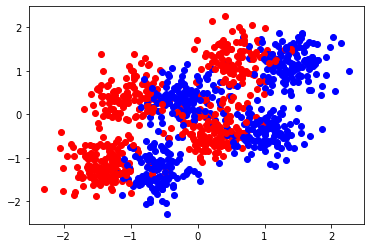

In [7]:
ind=0
for v in train_val:
    if train_labels[ind]==1 :
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1
    

In [8]:
len(train_val)

1000

In [9]:

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(2,)))
model.add(layers.Dense(750))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_val,
                    train_labels,
                    epochs=100,
                    batch_size=60,
                    validation_data=(val_val, val_labels))

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 266us/step - loss: 0.5647 - acc: 0.6330 - val_loss: 0.5558 - val_acc: 0.6760
Epoch 2/100
1000/1000 [==============================] - 0s 43us/step - loss: 0.5436 - acc: 0.6690 - val_loss: 0.5451 - val_acc: 0.6480
Epoch 3/100
1000/1000 [==============================] - 0s 44us/step - loss: 0.5274 - acc: 0.6750 - val_loss: 0.5309 - val_acc: 0.6640
Epoch 4/100
1000/1000 [==============================] - 0s 42us/step - loss: 0.5005 - acc: 0.6890 - val_loss: 0.5019 - val_acc: 0.6750
Epoch 5/100
1000/1000 [==============================] - 0s 42us/step - loss: 0.4657 - acc: 0.7090 - val_loss: 0.4777 - val_acc: 0.7140
Epoch 6/100
1000/1000 [==============================] - 0s 41us/step - loss: 0.4332 - acc: 0.7610 - val_loss: 0.4255 - val_acc: 0.7860
Epoch 7/100
1000/1000 [==============================] - 0s 40us/step - loss: 0.3930 - acc: 0.8200 - val_loss: 0.3922 - val_acc: 0.8290

1000/1000 [==============================] - 0s 41us/step - loss: 0.2848 - acc: 0.8850 - val_loss: 0.3261 - val_acc: 0.8590
Epoch 61/100
1000/1000 [==============================] - 0s 40us/step - loss: 0.2896 - acc: 0.8830 - val_loss: 0.3253 - val_acc: 0.8700
Epoch 62/100
1000/1000 [==============================] - 0s 37us/step - loss: 0.2859 - acc: 0.8830 - val_loss: 0.3351 - val_acc: 0.8510
Epoch 63/100
1000/1000 [==============================] - 0s 35us/step - loss: 0.2873 - acc: 0.8870 - val_loss: 0.3325 - val_acc: 0.8590
Epoch 64/100
1000/1000 [==============================] - 0s 35us/step - loss: 0.2886 - acc: 0.8680 - val_loss: 0.3298 - val_acc: 0.8610
Epoch 65/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.2869 - acc: 0.8830 - val_loss: 0.3368 - val_acc: 0.8480
Epoch 66/100
1000/1000 [==============================] - 0s 39us/step - loss: 0.2925 - acc: 0.8730 - val_loss: 0.3266 - val_acc: 0.8650
Epoch 67/100
1000/1000 [==============================

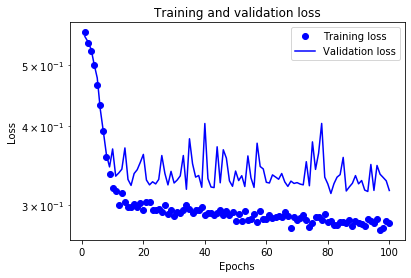

In [11]:
history_dict = history.history
history_dict.keys()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.show()

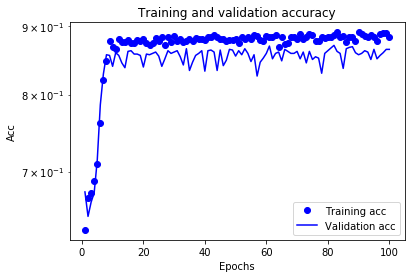

In [12]:
plt.clf()  
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.yscale('log')
plt.legend()

plt.show()



In [13]:
result = model.predict(test_val)

result_train = model.predict(train_val)
scores = model.evaluate(test_val, test_labels, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1000/1000 [==============================] - 0s 19us/step
Accuracy: 88.20%


In [14]:
re = np.around(result)
re_train = np.around(result_train)

pred_score = f1_score(test_labels,re)
print(pred_score)

0.8831683168316831


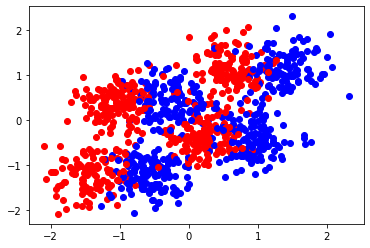

In [15]:
ind=0
for v in test_val:
    if test_labels[ind]==1:
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1

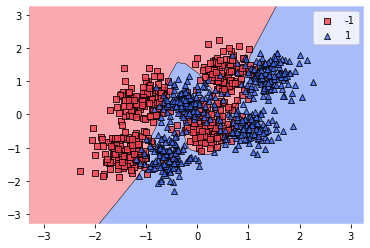

In [16]:
c =['red','blue']
ax=plot_decision_regions(train_val, train_labels[:,0], clf=model,legend=0,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['-1', '1'])
plt.show()

In [21]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22c93260278>)

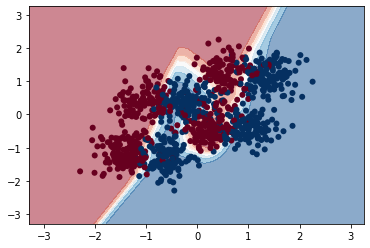

In [22]:
plot_decision_boundary(train_val, train_labels[:,0], model, cmap='RdBu')

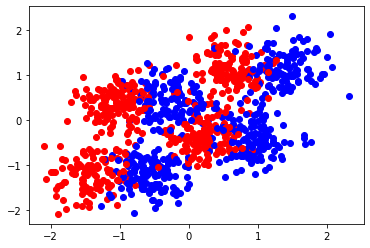

In [122]:
ind=0
for v in test_val:
    if test_labels[ind]==1 :
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1


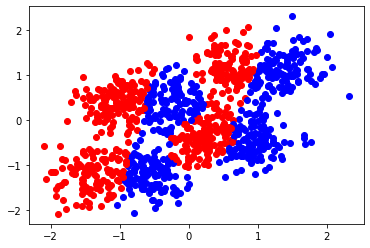

In [123]:
ind=0
for v in test_val:
    if re[ind]==1:
        c='bo'
    else:
        c='ro'
    plt.plot(v[0],v[1],c)
    ind=ind+1

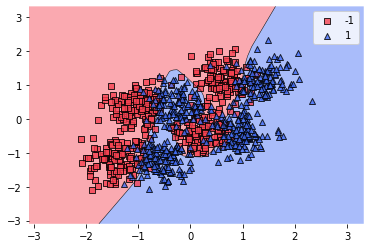

In [124]:

c =['red','blue']
ax=plot_decision_regions(test_val, test_labels[:,0], clf=model,legend=0,colors='#f54251,#426cf5')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['-1', '1'])
plt.show()